## Arquitectura de HIVE

HIVE es una aplicación que funciona sobre Hadoop y que permite usar sentencias tipo SQL sobre un cluster Hadoop:

- Transforma sentencias tipo SQL en jobs sobre un cluster Hadoop (usando en algunos casos MapReduce)
- Almacena las tablas como ficheros planos en HDFS


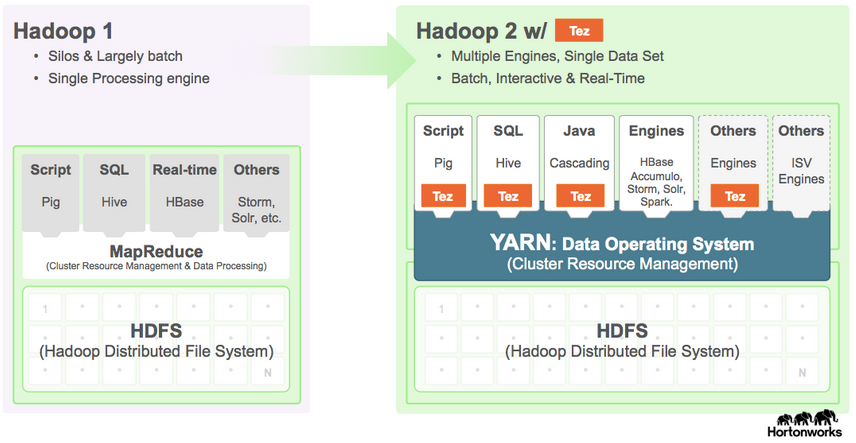

In [7]:
from IPython.display import Image
Image(filename='imgs/hadoop-hive-tez.png') 

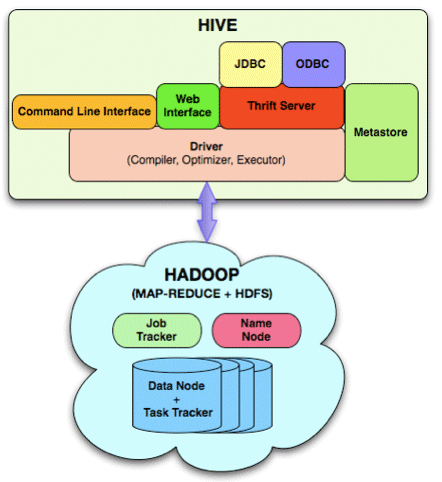

In [8]:
from IPython.display import Image
Image(filename='imgs/hive_architecture.png') 

# HIVE quickstart

<font color="red">**HAZ ESTOS PASOS DESDE UN TERMINAL Y EL DIRECTORIO DEL REPOSITORIO DEL CURSO USANDO `cd <dir_repo>`**</font>

sustituye `<dir_repo>` por el directorio en el que reside el curso, p.ej.

    cd /home/vagrant/2017.bidg

### 1. HDFS + HADOOP

en un terminal nuevo

- asegúrate que arrancas una instalación limpia (formateada) de HDFS
- arranca hdfs
- configura el cliente de Hadoop para correr en LOCAL de la siguiente manera

en el fichero

    /opt/hadoop-2.6.5/etc/hadoop/mapred-site.xml

cambia el valor de la opción

    mapreduce.framework.name
    
al valor

    local

### 2. prepara almacenamiento HIVE

     > cd <dir_repo>
     > hadoop fs -mkdir       /tmp
     > hadoop fs -mkdir       /user/hive/warehouse
     > hadoop fs -chmod a+rw   /tmp
     > hadoop fs -chmod a+rw   /user/hive/warehouse
     > schematool -dbType derby -initSchema     

### 3. arranca HIVE

en un terminal

    > cd <dir_repo>
    > hiveserver2
    
los ficheros de log están en `/tmp`

si quieres ver mensages de debug:

    > hiveserver2 --hiveconf hive.root.logger=DEBUG,console
    
### 4. verifica la utilidad de linea de comando de HIVE

en un terminal

     > beeline -n vagrant -u jdbc:hive2://localhost:10000
     
y en el prompt
   
     > show tables;
     
ctrl-C para salir del prompt

### 5. realiza un ejemplo

desde beeline

    > CREATE TABLE pokes (foo INT, bar STRING);
    > LOAD DATA LOCAL INPATH '/opt/hive-2.3.0/examples/files/kv1.txt' OVERWRITE INTO TABLE pokes;
    > DESCRIBE pokes;
    > SELECT * from pokes;
    > SELECT COUNT(*) FROM pokes GROUP BY foo;
   
observa que

- en el log del servidor hive, se informa sobre los jobs map-reduce ejecutados en local.
- HIVE usa HDFS como almacenamiento: http://localhost:50070/
- puedes ver información de la actividad de HIVE en: http://localhost:10002/

### 6. configura HADOOP para ejecución en cluster

sal de beeline y para el servidor hive (cntrl-C) y en el fichero

    /opt/hadoop-2.6.5/etc/hadoop/mapred-site.xml

cambia el valor de la opción

    mapreduce.framework.name
    
al valor

    yarn
    
    
arranca el servidor del cluster map reduce y arranca de nuevo hive y la consola beeline

    > start-yarn.sh
    > hiveserver2
    > beeline -n vagrant -u jdbc:hive2://localhost:10000
    
ejecuta de nuevo el comando group by. Observa:

- en el log del servidor hive los jobs MR se ejecutan en modo cluster
- en HADOOP aparecen como cualquier otro job: http://localhost:8088/
- y puedes explorar la actividad de HIVE igualmente en http://localhost:10002/

# Flujo de trabajo con HIVE

<p/>
<font color="red">VUELVE A CONFIGURAR HADOOP EN MODO **LOCAL**</font>

### ejemplo con un fichero sencillo

In [1]:
!head -10 data/personas.txt

Deborah A. Hopper,Riparbella,28
Gail K. Caldwell,Vilklingen,29
Azalia A. Noel,Scarborough,38
Noble N. House,Lexington,20
Dominique U. Landry,Medemblik,22
Declan S. Lynch,Whyalla,61
Nasim W. Faulkner,Bolinne,56
Gage H. Price,Saint-Oyen,25
Emi G. Gilmore,La Rochelle,25
Juliet Z. Burks,Barghe,53


### creamos una tabla

In [18]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
show tables;   

0: jdbc:hive2://localhost:10000> show tables;   
+-----------+
| tab_name  |
+-----------+
+-----------+
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
No rows selected (1.972 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [19]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
drop table personal;
create table personal
(nombre STRING, ciudad STRING, edad BIGINT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

0: jdbc:hive2://localhost:10000> drop table personal;
0: jdbc:hive2://localhost:10000> create table personal
. . . . . . . . . . . . . . . .> (nombre STRING, ciudad STRING, edad BIGINT)
. . . . . . . . . . . . . . . .> ROW FORMAT DELIMITED
. . . . . . . . . . . . . . . .> FIELDS TERMINATED BY ','
. . . . . . . . . . . . . . . .> STORED AS TEXTFILE;
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
No rows affected (0.772 seconds)
No rows affected (1.656 seconds)
Closing: 0: jdbc:hive2://localhost:10000


### verificamos que la tabla está bien definida

In [20]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
describe personal;

0: jdbc:hive2://localhost:10000> describe personal;
+-----------+------------+----------+
| col_name  | data_type  | comment  |
+-----------+------------+----------+
| nombre    | string     |          |
| ciudad    | string     |          |
| edad      | bigint     |          |
+-----------+------------+----------+
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
3 rows selected (1.294 seconds)
Closing: 0: jdbc:hive2://localhost:10000


### cargamos datos a la tabla desde un fichero

In [22]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
LOAD DATA LOCAL INPATH './data/personas.txt' OVERWRITE INTO TABLE personal;

ERWRITE INTO TABLE personal;
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
No rows affected (2.666 seconds)
Closing: 0: jdbc:hive2://localhost:10000


### vemos cómo organiza HIVE las tablas en HDFS

In [23]:
!hdfs dfs -ls /user/hive/warehouse

17/08/19 15:10:07 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 2 items
drwxrwxrwx   - vagrant   supergroup          0 2017-08-19 15:09 /user/hive/warehouse/personal
drwxrwxrwx   - anonymous supergroup          0 2017-08-19 12:24 /user/hive/warehouse/pokes


In [24]:
!hdfs dfs -ls /user/hive/warehouse/personal

17/08/19 15:10:10 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 1 items
-rwxrwxrwx   1 vagrant supergroup       3080 2017-08-19 15:09 /user/hive/warehouse/personal/personas.txt


### hacemos un select, que HIVE traduce en un job map-reduce de Hadoop

In [ ]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
SELECT count(*) from personal where edad>40;

### inspeccionamos el plan de ejecución que realizó HIVE del query anterior

In [27]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
EXPLAIN SELECT count(*) from personal where edad>40;

d>40;
+----------------------------------------------------+
|                      Explain                       |
+----------------------------------------------------+
| STAGE DEPENDENCIES:                                |
|   Stage-1 is a root stage                          |
|   Stage-0 depends on stages: Stage-1               |
|                                                    |
| STAGE PLANS:                                       |
|   Stage: Stage-1                                   |
|     Map Reduce                                     |
|       Map Operator Tree:                           |
|           TableScan                                |
|             alias: personal                        |
|             Statistics: Num rows: 385 Data size: 3080 Basic stats: COMPLETE Column stats: NONE |
|             Filter Operator                        |
|               predicate: (edad > 40) (type: boolean) |
|               Statistics: Num rows: 128 Data size: 1024 Basic stat

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
45 rows selected (1.656 seconds)
Closing: 0: jdbc:hive2://localhost:10000


### Hacemos otro query

In [2]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
SELECT nombre from personal WHERE edad>20 and edad<40;

dad<40;
+----------------------+
|        nombre        |
+----------------------+
| Deborah A. Hopper    |
| Gail K. Caldwell     |
| Azalia A. Noel       |
| Dominique U. Landry  |
| Gage H. Price        |
| Emi G. Gilmore       |
| Slade H. Holloway    |
| Geoffrey Z. Webster  |
| Blossom V. Oneal     |
| Moana V. Wagner      |
| Jerry B. Mendez      |
| Vera Y. Keller       |
| Castor F. Medina     |
| Luke I. Hoffman      |
| Kirk H. Brooks       |
| Abbot O. Alvarez     |
| Brendan X. Lyons     |
| Constance A. Willis  |
| Aline L. Morrow      |
| Zelda L. Downs       |
| Carl T. Hopper       |
| Beatrice Z. Murray   |
| Tasha B. Reilly      |
| Alfreda V. Mitchell  |
| Nita S. Sharpe       |
| Gage H. Strong       |
| Lamar O. Hobbs       |
| Xanthus Y. Matthews  |
| Kieran F. Marks      |
| Cheryl L. Roy        |
| Nola X. Griffin      |
| Cameran H. Combs     |
| Yael L. Cox          |
+----------------------+
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
33 rows selected (0.51 seconds)
Closing: 0: jdbc:hive2://localhost:10000


### En este caso HIVE usa Tez y YARN sin necesitar Map-Reduce

In [3]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
EXPLAIN SELECT nombre from personal WHERE edad>20 and edad<40;

20 and edad<40;
+----------------------------------------------------+
|                      Explain                       |
+----------------------------------------------------+
| STAGE DEPENDENCIES:                                |
|   Stage-0 is a root stage                          |
|                                                    |
| STAGE PLANS:                                       |
|   Stage: Stage-0                                   |
|     Fetch Operator                                 |
|       limit: -1                                    |
|       Processor Tree:                              |
|         TableScan                                  |
|           alias: personal                          |
|           Statistics: Num rows: 28 Data size: 3080 Basic stats: COMPLETE Column stats: NONE |
|           Filter Operator                          |
|             predicate: ((edad > 20) and (edad < 40)) (type: boolean) |
|             Statistics: Num rows: 3 Data si

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
20 rows selected (0.591 seconds)
Closing: 0: jdbc:hive2://localhost:10000


## Particiones

In [4]:
!ls data/user-posts*

data/user-posts-CO.txt	data/user-posts-FR.txt	data/user-posts-US.txt


In [5]:
!cat data/user-posts-US.txt

user1,Funny Story,1343182026191
user2,Cool Deal,1343182133839
user4,Interesting Post,1343182154633
user5,Yet Another Blog,13431839394


In [6]:
!cat data/user-posts-CO.txt

user6,Ocurrencia,134318202681
user6,Vendo moto,1343182192
user7,Historia,1343182109
user8,Mi blog,134318399


In [7]:
!cat data/user-posts-FR.txt

utilisateur32,voiture us��e,1343182026291
utilisateur21,vends maison,1343182026333
utilisateur90,cherche chien,1343182026891
utilisateur7,mon travail,1343182026999


In [11]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
drop table personal;
create table personal
(nombre STRING, ciudad STRING, edad BIGINT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

0: jdbc:hive2://localhost:10000> drop table personal;
0: jdbc:hive2://localhost:10000> create table personal
. . . . . . . . . . . . . . . .> (nombre STRING, ciudad STRING, edad BIGINT)
. . . . . . . . . . . . . . . .> ROW FORMAT DELIMITED
. . . . . . . . . . . . . . . .> FIELDS TERMINATED BY ','
. . . . . . . . . . . . . . . .> STORED AS TEXTFILE;
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
No rows affected (9.852 seconds)
No rows affected (0.918 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [15]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
drop table posts;
CREATE TABLE posts (xuser STRING, post STRING, time BIGINT)
PARTITIONED BY(country STRING)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

0: jdbc:hive2://localhost:10000> drop table posts;
time BIGINT)
. . . . . . . . . . . . . . . .> PARTITIONED BY(country STRING)
. . . . . . . . . . . . . . . .> ROW FORMAT DELIMITED
. . . . . . . . . . . . . . . .> FIELDS TERMINATED BY ','
. . . . . . . . . . . . . . . .> STORED AS TEXTFILE;
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
No rows affected (0.585 seconds)
No rows affected (0.349 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [16]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
LOAD DATA LOCAL INPATH 'data/user-posts-CO.txt' OVERWRITE INTO TABLE posts PARTITION(country='CO');
LOAD DATA LOCAL INPATH 'data/user-posts-US.txt' OVERWRITE INTO TABLE posts PARTITION(country='US');
LOAD DATA LOCAL INPATH 'data/user-posts-FR.txt' OVERWRITE INTO TABLE posts PARTITION(country='FR');

 OVERWRITE INTO TABLE posts PARTITION(country='CO');
 OVERWRITE INTO TABLE posts PARTITION(country='US');
 OVERWRITE INTO TABLE posts PARTITION(country='FR');
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
No rows affected (1.608 seconds)
No rows affected (1.393 seconds)
No rows affected (1.25 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [17]:
%%script beeline -n vagrant -u jdbc:hive2://localhost:10000
describe posts;

0: jdbc:hive2://localhost:10000> describe posts;
+--------------------------+-----------------------+-----------------------+
|         col_name         |       data_type       |        comment        |
+--------------------------+-----------------------+-----------------------+
| xuser                    | string                |                       |
| post                     | string                |                       |
| time                     | bigint                |                       |
| country                  | string                |                       |
|                          | NULL                  | NULL                  |
| # Partition Information  | NULL                  | NULL                  |
| # col_name               | data_type             | comment               |
|                          | NULL                  | NULL                  |
| country                  | string                |                       |
+--------------------------

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
9 rows selected (0.713 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [19]:
%%script  beeline -n vagrant -u jdbc:hive2://localhost:10000
SELECT * from posts;

0: jdbc:hive2://localhost:10000> SELECT * from posts;
+----------------+-------------------+----------------+----------------+
|  posts.xuser   |    posts.post     |   posts.time   | posts.country  |
+----------------+-------------------+----------------+----------------+
| user6          | Ocurrencia        | 134318202681   | CO             |
| user6          | Vendo moto        | 1343182192     | CO             |
| user7          | Historia          | 1343182109     | CO             |
| user8          | Mi blog           | 134318399      | CO             |
| utilisateur32  | voiture us?e      | 1343182026291  | FR             |
| utilisateur21  | vends maison      | 1343182026333  | FR             |
| utilisateur90  | cherche chien     | 1343182026891  | FR             |
| utilisateur7   | mon travail       | 1343182026999  | FR             |
| user1          | Funny Story       | 1343182026191  | US             |
| user2          | Cool Deal         | 1343182133839  | US            

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
12 rows selected (0.551 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [20]:
%%script  beeline -n vagrant -u jdbc:hive2://localhost:10000
SELECT * from posts where country="US";

0: jdbc:hive2://localhost:10000> SELECT * from posts where country="US";
+--------------+-------------------+----------------+----------------+
| posts.xuser  |    posts.post     |   posts.time   | posts.country  |
+--------------+-------------------+----------------+----------------+
| user1        | Funny Story       | 1343182026191  | US             |
| user2        | Cool Deal         | 1343182133839  | US             |
| user4        | Interesting Post  | 1343182154633  | US             |
| user5        | Yet Another Blog  | 13431839394    | US             |
+--------------+-------------------+----------------+----------------+
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
4 rows selected (0.808 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [21]:
%%script  beeline -n vagrant -u jdbc:hive2://localhost:10000
show partitions posts;

0: jdbc:hive2://localhost:10000> show partitions posts;
+-------------+
|  partition  |
+-------------+
| country=CO  |
| country=FR  |
| country=US  |
+-------------+
0: jdbc:hive2://localhost:10000> 

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/opt/hive-2.3.0/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/opt/hadoop-2.6.5/share/hadoop/common/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://localhost:10000
Connected to: Apache Hive (version 2.3.0)
Driver: Hive JDBC (version 2.3.0)
Transaction isolation: TRANSACTION_REPEATABLE_READ
Beeline version 2.3.0 by Apache Hive
3 rows selected (0.586 seconds)
Closing: 0: jdbc:hive2://localhost:10000


In [22]:
!hdfs dfs -ls /user/hive/warehouse

17/08/19 15:39:53 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 3 items
drwxrwxrwx   - vagrant   supergroup          0 2017-08-19 15:36 /user/hive/warehouse/personal
drwxrwxrwx   - anonymous supergroup          0 2017-08-19 12:24 /user/hive/warehouse/pokes
drwxrwxrwx   - vagrant   supergroup          0 2017-08-19 15:38 /user/hive/warehouse/posts


In [23]:
!hdfs dfs -ls /user/hive/warehouse/posts

17/08/19 15:39:59 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 3 items
drwxrwxrwx   - vagrant supergroup          0 2017-08-19 15:38 /user/hive/warehouse/posts/country=CO
drwxrwxrwx   - vagrant supergroup          0 2017-08-19 15:38 /user/hive/warehouse/posts/country=FR
drwxrwxrwx   - vagrant supergroup          0 2017-08-19 15:38 /user/hive/warehouse/posts/country=US


In [24]:
!hdfs dfs -ls /user/hive/warehouse/posts/country=CO

17/08/19 15:40:06 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 1 items
-rwxrwxrwx   1 vagrant supergroup        108 2017-08-19 15:38 /user/hive/warehouse/posts/country=CO/user-posts-CO.txt
